In [1]:
import numpy as np
import pandas as pd
import plotly

# 1. Simple Setting
- 10 investment strategies: randomly assign to people

In [2]:
def simulate_society(num_people, interest_rate, scaling_factor, iteration_time):
    # Initialize the society
    m = 100.0  # Starting money for each person
    wealth = np.full(num_people, m)  # Initial wealth for all people

    # Generate random investment strategy type for each person (0 for conservative, 1 for moderate, 2 for aggressive)
    investment_strategy = np.random.randint(0, 10, num_people)

    # Assign investment ratio based on strategy type
    strategies = {
        0: {"name": "s1", "ratio": 0},
        1: {"name": "s2", "ratio": 0.1},
        2: {"name": "s3", "ratio": 0.2},
        3: {"name": "s4", "ratio": 0.3},
        4: {"name": "s5", "ratio": 0.4},
        5: {"name": "s6", "ratio": 0.5},
        6: {"name": "s7", "ratio": 0.6},
        7: {"name": "s8", "ratio": 0.7},
        8: {"name": "s9", "ratio": 0.8},
        9: {"name": "s10", "ratio": 0.9},
        10: {"name": "s11", "ratio": 1}

    }

    investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

    # Lists to store wealth distribution after each round
    wealth_distribution = [wealth.copy()]

    # Run simulation for 'iteration_time' rounds
    for _ in range(iteration_time):
        # Calculate investment and consumption amount for each person
        investment_amount = investment_ratio * wealth

        total_consumption = np.sum((1 - investment_ratio) * wealth)
        consumption_amount = np.full(num_people, total_consumption / num_people)

        # Simulate investment and update wealth
        investment_returns = np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
        wealth += investment_amount * investment_returns

        # Calculate consumption and update wealth
        wealth -= investment_amount
        wealth += consumption_amount

        # Ensure wealth is non-negative
        wealth = np.maximum(wealth, 0)

        # Store the wealth distribution after each round
        wealth_distribution.append(wealth.copy())

    return wealth_distribution

In [3]:
# plot the wealth distribution for each round

def plot_wealth_distribution(wealth_distribution):

    # Create figure
    fig = plotly.graph_objects.Figure()

    # Add traces, one for each slider step
    for wealth in wealth_distribution:
        fig.add_trace(
            plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
        
    # Make 10th trace visible
    fig.data[10].visible = True

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):

        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "Round: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders,
        width=800,
        height=600,
    )

    fig.show()

## 1.1 scaling_factor = 0.5

In [4]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0.5
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

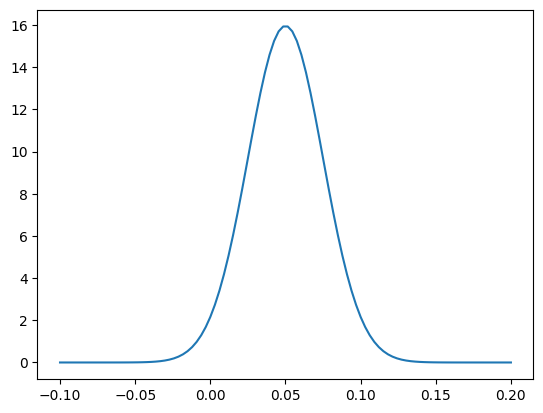

In [5]:
# plot the normal distribution interest return
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-0.1, 0.2, 100)
y = stats.norm.pdf(x, interest_rate,  scaling_factor * interest_rate)
plt.plot(x, y)
plt.show()

## 1.2 scaling_factor = 0 (no risk)

In [11]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

# 2. Advanced Model

In [42]:
import numpy as np
import matplotlib.pyplot as plt

class InvestmentSimulation:
    def __init__(self, num_people, interest_rate, scaling_factor, iteration_time):
        self.num_people = num_people
        self.interest_rate = interest_rate
        self.scaling_factor = scaling_factor
        self.iteration_time = iteration_time
        self.wealth_distribution = None

    def assign_investment_types(self):
        # Define the investment strategies
        strategies = [
            {"name": "Conservative", "ratio": 0.1},
            {"name": "Moderate 1", "ratio": 0.2},
            {"name": "Moderate 2", "ratio": 0.3},
            {"name": "Moderate 3", "ratio": 0.4},
            {"name": "Moderate 4", "ratio": 0.5},
            {"name": "Aggressive 1", "ratio": 0.6},
            {"name": "Aggressive 2", "ratio": 0.7},
            {"name": "Aggressive 3", "ratio": 0.8},
            {"name": "Aggressive 4", "ratio": 0.9},
            {"name": "Aggressive 5", "ratio": 1.0},
        ]

        # Calculate the Pareto weights based on strategy ratios
        ratios = np.array([strategy["ratio"] for strategy in strategies])
        weights = 1 / ratios
        pareto_weights = weights / np.sum(weights)

        # Use the Pareto weights to assign investment strategies to individuals
        investment_strategy = np.random.choice(len(strategies), size=self.num_people, p=pareto_weights)
        
        self.investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

        return self.investment_ratio

    def simulate_society(self):
        # Initialize the society
        m = 100.0  # Starting money for each person
        wealth = np.full(self.num_people, m)  # Initial wealth for all people

        # Generate investment strategy type for each person using random choice
        investment_ratio = self.assign_investment_types()

        # Lists to store wealth distribution after each round
        wealth_distribution = [wealth.copy()]

        # Run simulation for 'iteration_time' rounds
        for _ in range(self.iteration_time):
            # Calculate total consumption amount for the round
            total_consumption = np.sum((1 - investment_ratio) * wealth)

            # Calculate investment and consumption amount for each person
            investment_amount = investment_ratio * wealth
            consumption_amount = np.full(self.num_people, total_consumption / self.num_people)

            # Simulate investment and update wealth
            investment_returns = np.random.normal(self.interest_rate, self.scaling_factor * self.interest_rate, self.num_people)
            wealth += investment_amount * investment_returns

            # Calculate consumption and update wealth
            #wealth -= investment_amount
            wealth += consumption_amount

            # Ensure wealth is non-negative
            wealth = np.maximum(wealth, 0)

            # Store the wealth distribution after each round
            wealth_distribution.append(wealth.copy())

        self.wealth_distribution = wealth_distribution

    def plot_wealth_distribution(self):

        fig = plotly.graph_objects.Figure()

        # Add traces, one for each slider step
        for wealth in self.wealth_distribution:
            fig.add_trace(
                plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
            
        # Make 10th trace visible
        fig.data[10].visible = True

        # Create and add slider
        steps = []
        for i in range(len(fig.data)):

            step = dict(
                method="update",
                args=[{"visible": [False] * len(fig.data)},
                    {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
            )
            step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
            steps.append(step)

        sliders = [dict(
            active=10,
            currentvalue={"prefix": "Round: "},
            pad={"t": 50},
            steps=steps
        )]

        fig.update_layout(
            sliders=sliders,
            width=800,
            height=600,
        )

        fig.show()


In [60]:
if __name__ == "__main__":
    num_people = 100
    interest_rate = 0.05
    scaling_factor = 1
    iteration_time = 100

    simulation = InvestmentSimulation(num_people, interest_rate, scaling_factor, iteration_time)
    simulation.simulate_society()
    simulation.plot_wealth_distribution()

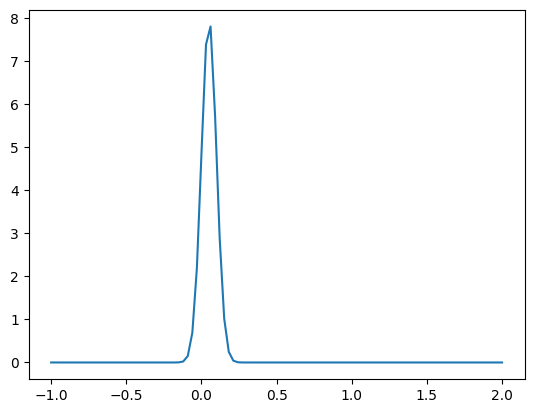

In [61]:
# plot the normal distribution interest return
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-1, 2, 100)
y = stats.norm.pdf(x, interest_rate,  scaling_factor * interest_rate)
plt.plot(x, y)
plt.show()

In [53]:
# sum the wealth by strategy group 
df_strategy = pd.DataFrame(simulation.investment_ratio)
df_wealth = pd.DataFrame(simulation.wealth_distribution).T
df_wealth["strategy"] = df_strategy

In [54]:
df_wealth.groupby('strategy').sum()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
strategy,,,,,,,,,,,,,,,,,,,,,
0.1,2600.0,4333.633347,7255.830491,12335.584248,20615.478265,35031.635386,60391.968711,102940.493877,178482.777330,303622.628862,...,6.117615e+24,1.041005e+25,1.778731e+25,3.046491e+25,5.303767e+25,9.219735e+25,1.585460e+26,2.713054e+26,4.669649e+26,7.892354e+26
0.2,2300.0,3870.528543,6669.998221,11433.259175,19482.105792,33144.443756,56067.052696,94787.293306,161507.628413,278507.380073,...,5.519737e+24,9.566265e+24,1.677623e+25,2.872695e+25,4.891031e+25,8.489846e+25,1.469873e+26,2.480019e+26,4.213353e+26,7.341343e+26
0.3,1300.0,2221.147474,3877.731196,6565.964849,11455.782953,19871.230417,30635.248482,55303.157414,93431.660135,160261.217179,...,3.299615e+24,5.903855e+24,1.058432e+25,1.705075e+25,2.916917e+25,4.806178e+25,8.112073e+25,1.421966e+26,2.430000e+26,4.265505e+26
0.4,800.0,1413.469239,2495.535137,4296.158041,7566.110850,11872.386702,20752.071563,38305.170508,68218.422735,114672.561618,...,1.866019e+24,3.036144e+24,5.722063e+24,1.109547e+25,2.036685e+25,3.536924e+25,5.828950e+25,1.093210e+26,1.665108e+26,2.888513e+26
0.5,700.0,1154.166378,1966.375043,3459.313250,5811.495960,9966.217004,19028.849530,33146.748208,59883.281142,91705.875954,...,1.938817e+24,3.529016e+24,5.400958e+24,9.511713e+24,1.734117e+25,2.839053e+25,4.584111e+25,8.023121e+25,1.423525e+26,2.442107e+26
0.6,400.0,762.850390,1239.062275,2296.094489,4100.360527,6998.409382,13963.898516,19660.701587,33131.067394,50344.453367,...,9.069532e+23,1.564171e+24,3.331604e+24,6.724947e+24,9.860898e+24,1.639941e+25,2.905384e+25,4.841388e+25,9.369579e+25,1.708333e+26
0.7,300.0,412.641985,989.506353,1625.117820,2957.991786,5113.881735,9052.900124,19239.770237,35501.128933,74092.476870,...,1.040297e+24,1.719215e+24,3.778370e+24,4.587647e+24,7.849822e+24,1.381736e+25,2.754103e+25,4.385108e+25,8.529705e+25,1.366449e+26
0.8,900.0,1540.254608,2927.484352,4860.800933,8100.807912,12371.631197,19136.472332,39196.604072,69622.918578,135220.512723,...,2.764928e+24,5.153022e+24,9.490065e+24,1.507732e+25,2.864842e+25,4.033489e+25,6.692056e+25,1.375952e+26,2.255435e+26,3.570947e+26
0.9,500.0,1031.526983,1979.239880,2997.335090,5542.630175,8998.801842,17195.655593,30620.924530,48760.031965,67458.699718,...,2.112451e+24,2.791601e+24,5.800549e+24,1.046334e+25,1.946172e+25,2.772359e+25,5.953594e+25,1.339874e+26,2.133745e+26,3.758636e+26


In [56]:
strategies = [
            {"name": "Conservative1", "ratio": 0},
            {"name": "Conservative2", "ratio": 0.1},
            {"name": "Moderate 1", "ratio": 0.2},
            {"name": "Moderate 2", "ratio": 0.3},
            {"name": "Moderate 3", "ratio": 0.4},
            {"name": "Moderate 4", "ratio": 0.5},
            {"name": "Moderate 5", "ratio": 0.6},
            {"name": "Moderate 6", "ratio": 0.7},
            {"name": "Aggressive 1", "ratio": 0.8},
            {"name": "Aggressive 2", "ratio": 0.9}
        ]

# Calculate the Pareto weights based on strategy ratios
ratios = np.array([strategy["ratio"] for strategy in strategies])
weights = 1 / ratios
pareto_weights = weights / np.sum(weights)

# Use the Pareto weights to assign investment strategies to individuals
investment_strategy = np.random.choice(len(strategies), num_people, p=pareto_weights)

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_46818/1666835101.py:16: RuntimeWarning:

divide by zero encountered in true_divide

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_46818/1666835101.py:17: RuntimeWarning:

invalid value encountered in true_divide



ValueError: probabilities contain NaN

In [55]:
ratios

NameError: name 'ratios' is not defined

In [76]:
weights

array([10.        ,  5.        ,  3.33333333,  2.5       ,  2.        ,
        1.66666667,  1.42857143,  1.25      ,  1.11111111,  1.        ])

In [77]:
pareto_weights

array([0.34141715, 0.17070858, 0.11380572, 0.08535429, 0.06828343,
       0.05690286, 0.04877388, 0.04267714, 0.03793524, 0.03414172])

In [57]:
investment_strategy

NameError: name 'investment_strategy' is not defined